In [127]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [128]:
#17년도 기온데이터 전처리csv 파일을 tem17에 저장
tem17 = pd.read_csv("data/2017기온데이터_전처리.csv").drop(['Unnamed: 0.1','Unnamed: 0'], axis=1)
tem17

날짜     시간  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)
0     2017-01-01   0:00     0.2      0.0      2.2   79.0
1     2017-01-01   1:00     0.0      0.0      1.4   78.0
2     2017-01-01   2:00    -0.3      0.0      1.9   81.0
3     2017-01-01   3:00    -0.7      0.0      2.0   84.0
4     2017-01-01   4:00    -1.1      0.0      1.6   85.0
...          ...    ...     ...      ...      ...    ...
8755  2017-12-31  19:00     0.0      0.0      2.2   31.0
8756  2017-12-31  20:00    -1.0      0.0      0.9   32.0
8757  2017-12-31  21:00    -1.6      0.0      1.0   35.0
8758  2017-12-31  22:00    -2.1      0.0      1.7   36.0
8759  2017-12-31  23:00    -2.6      0.0      0.6   40.0

[8760 rows x 6 columns]

In [129]:
# 위와 마찬가지로 21년도 기온데이터 전처리를 tem21에 저장
tem21 = pd.read_csv("data/2021기온데이터_전처리.csv").drop(['Unnamed: 0'], axis=1)
tem21

날짜     시간  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)
0     2021-01-01  00:00    -8.3      0.0      1.8   66.0
1     2021-01-01  01:00    -8.7      0.0      2.4   68.0
2     2021-01-01  02:00    -9.1      0.0      1.6   69.0
3     2021-01-01  03:00    -9.3      0.0      1.1   70.0
4     2021-01-01  04:00    -9.3      0.0      0.3   71.0
...          ...    ...     ...      ...      ...    ...
8755  2021-12-31  19:00    -6.4      0.0      2.2   34.0
8756  2021-12-31  20:00    -6.3      0.0      4.1   35.0
8757  2021-12-31  21:00    -6.7      0.0      4.8   36.0
8758  2021-12-31  22:00    -7.5      0.0      3.0   37.0
8759  2021-12-31  23:00    -7.7      0.0      2.9   38.0

[8760 rows x 6 columns]

In [130]:
#17년도와 21년도 수요량을 합친 csv파일을 불러와서 저장시킨다 
elec = pd.read_csv("data/fintime1721_df.csv")

In [131]:
#17년도 행 갯수가 8759개 인것을 확인
elec.loc[8759]

날짜     2017-12-31
시간          23:00
수요량         61400
Name: 8759, dtype: object

In [132]:
#총 8760개의 17년도 파일을 elec17에 따로 저장
elec17 = elec.loc[:8759]
elec17

날짜     시간    수요량
0     2017-01-01  00:00  59177
1     2017-01-01  01:00  59234
2     2017-01-01  02:00  56664
3     2017-01-01  03:00  54641
4     2017-01-01  04:00  53749
...          ...    ...    ...
8755  2017-12-31  19:00  60937
8756  2017-12-31  20:00  60807
8757  2017-12-31  21:00  60454
8758  2017-12-31  22:00  60127
8759  2017-12-31  23:00  61400

[8760 rows x 3 columns]

In [133]:
#나머지 8760개의 21년도 파일을 elec21에 저장
elec21 = elec.loc[8760:]
# 인덱스 번호를 초기화시키고 저장한다
elec21 = elec21.reset_index().drop('index', axis=1)
elec21

날짜     시간    수요량
0     2021-01-01  00:00  63055
1     2021-01-01  01:00  64942
2     2021-01-01  02:00  62593
3     2021-01-01  03:00  60905
4     2021-01-01  04:00  59889
...          ...    ...    ...
8755  2021-12-31  19:00  74578
8756  2021-12-31  20:00  72976
8757  2021-12-31  21:00  71602
8758  2021-12-31  22:00  69383
8759  2021-12-31  23:00  68874

[8760 rows x 3 columns]

In [134]:
#elec17 의 날짜 컬럼을 삭제한다
elec17.drop(['날짜'], axis=1, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_10856\3549522099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elec17.drop(['날짜'], axis=1, inplace=True)


In [135]:
#tem17 의 시간 컬럼을 삭제한다
tem17.drop(['시간'], axis=1, inplace=True)

In [136]:
#두개의 tem17,elec17 csv파일을 열 기준으로 붙인다
fin17 = pd.concat([tem17,elec17],axis=1)

fin17

날짜  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)     시간    수요량
0     2017-01-01     0.2      0.0      2.2   79.0  00:00  59177
1     2017-01-01     0.0      0.0      1.4   78.0  01:00  59234
2     2017-01-01    -0.3      0.0      1.9   81.0  02:00  56664
3     2017-01-01    -0.7      0.0      2.0   84.0  03:00  54641
4     2017-01-01    -1.1      0.0      1.6   85.0  04:00  53749
...          ...     ...      ...      ...    ...    ...    ...
8755  2017-12-31     0.0      0.0      2.2   31.0  19:00  60937
8756  2017-12-31    -1.0      0.0      0.9   32.0  20:00  60807
8757  2017-12-31    -1.6      0.0      1.0   35.0  21:00  60454
8758  2017-12-31    -2.1      0.0      1.7   36.0  22:00  60127
8759  2017-12-31    -2.6      0.0      0.6   40.0  23:00  61400

[8760 rows x 7 columns]

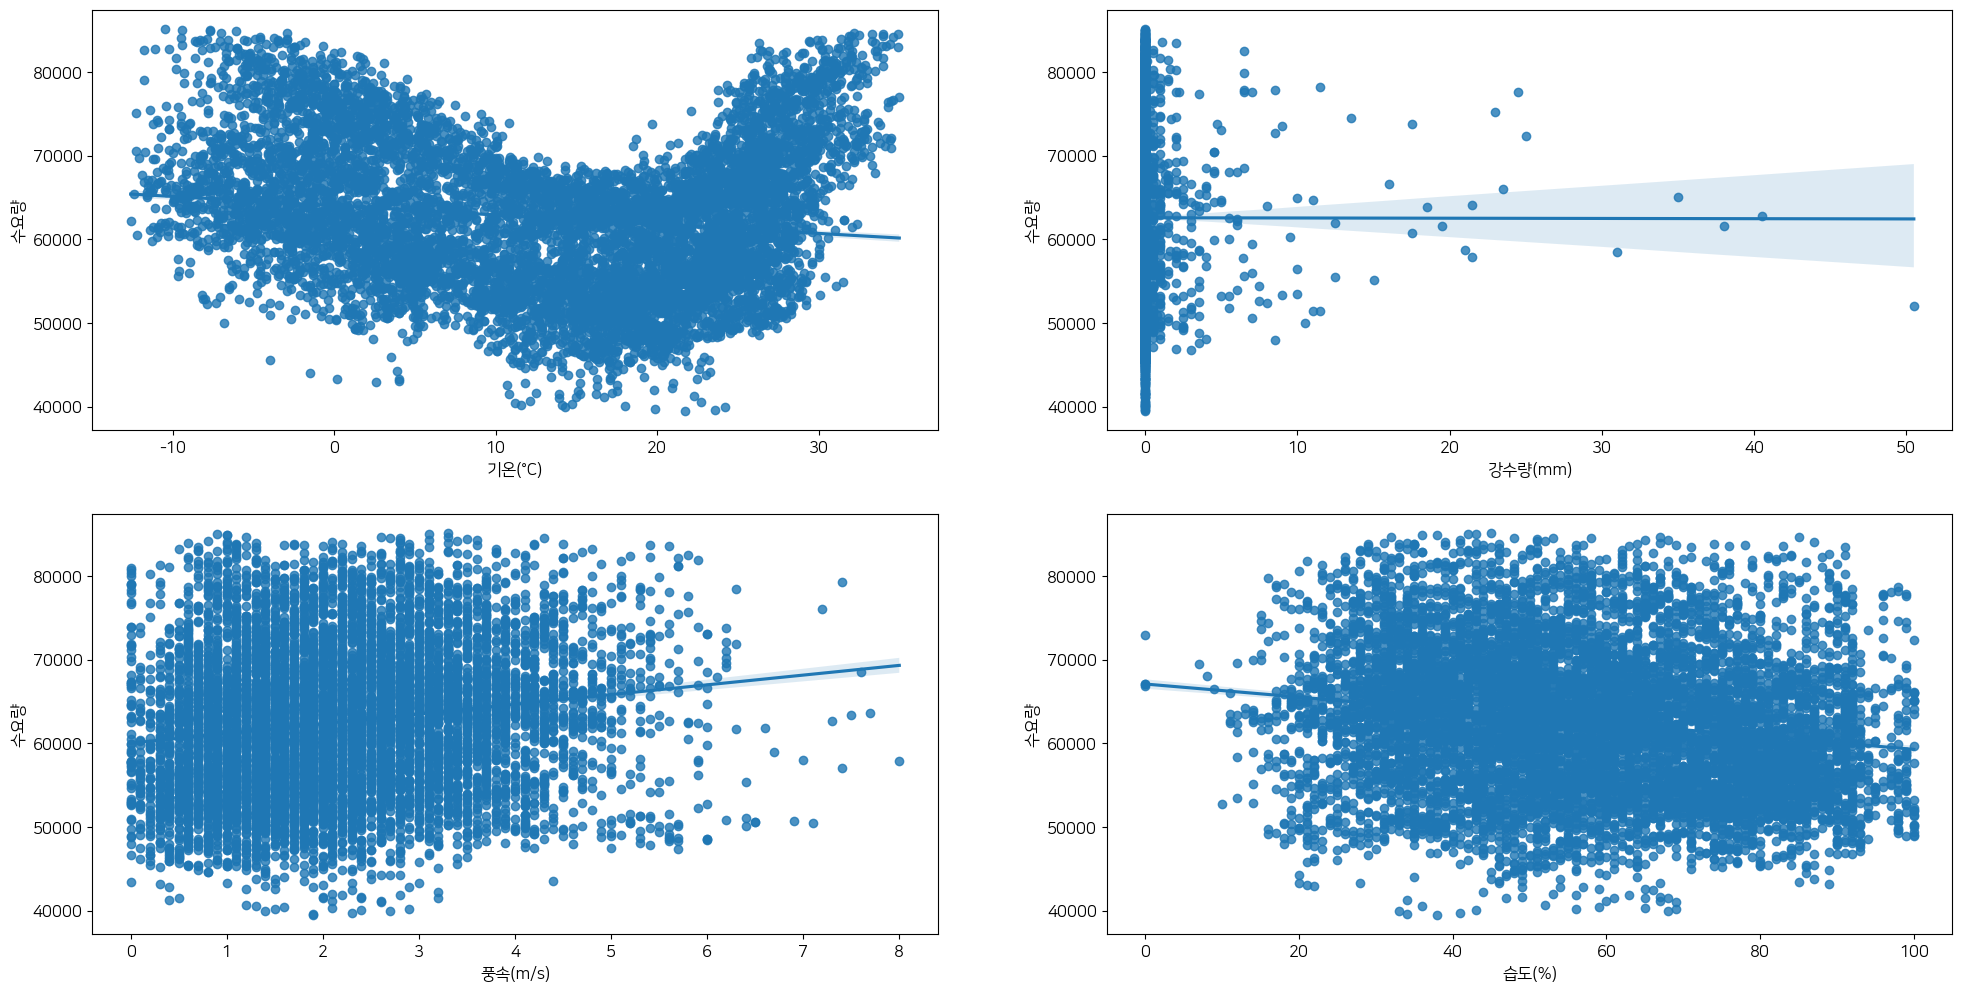

In [137]:
# fig = 외부의 액자 개념 
# axs = 내부에 그려지는 그림들 개념
#사이즈를 가로 24 세로 12로 설정한 뒤 2x2 크기의 서브 플롯을 생성한다
fig, axs = plt.subplots(figsize=(24, 12), ncols=2, nrows=2)
lm_features = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']

# sns.regplot(x='기온(°C)', y='수요량', data=fin17, ax=axs[0][0])
# sns.regplot(x='강수량(mm)', y='수요량', data=fin17, ax=axs[0][1])
# sns.regplot(x='풍속(m/s)', y='수요량', data=fin17, ax=axs[1][0])
# sns.regplot(x='습도(%)', y='수요량', data=fin17, ax=axs[1][1])
#위아래가 같은 출력 값을 불러온다.

for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2
    sns.regplot(x=feature, y='수요량', data=fin17, ax=axs[row][col])


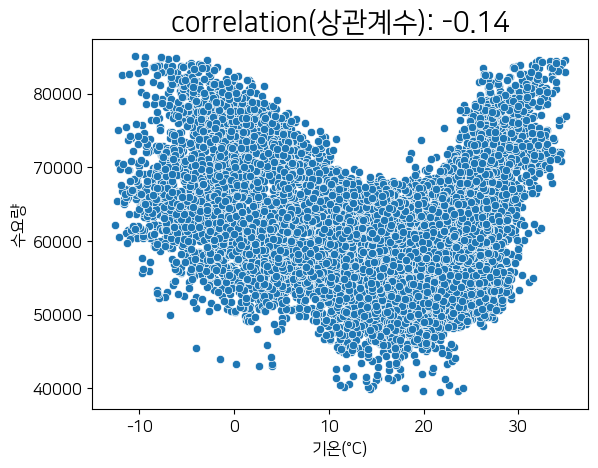

In [138]:
# 수요량과 기온량의 상관관계를 구한다
correlation = fin17['수요량'].corr(fin17['기온(°C)'])
# x깂을 기온, y값을 수요량에 맞춰 그래프를 그리게 한다
sns.scatterplot(x=fin17['기온(°C)'], y=fin17['수요량'])
#그래프 제목을 작성하는 것이다.      소수점 2쨰자리 까지 작성한다     글씨 크기는 20으로
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("기온(°C)",fontsize=12)
plt.ylabel("수요량",fontsize=12)
plt.show()

In [139]:
# 17년도와 마찬가지로 날짜 컬럼을 지운다(axis=1 > 열 기준으로)
elec21.drop(['날짜'], axis=1, inplace=True)

In [140]:
# 위와 마찬가지로 시간 컬럼을 지운다
tem21.drop(['시간'], axis=1, inplace=True)

In [141]:
# 17년도 와 마찬가지로 두개의 기온데이터, 수요량데이터를 합친다
fin21 = pd.concat([tem21,elec21],axis=1)

fin21

날짜  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)     시간    수요량
0     2021-01-01    -8.3      0.0      1.8   66.0  00:00  63055
1     2021-01-01    -8.7      0.0      2.4   68.0  01:00  64942
2     2021-01-01    -9.1      0.0      1.6   69.0  02:00  62593
3     2021-01-01    -9.3      0.0      1.1   70.0  03:00  60905
4     2021-01-01    -9.3      0.0      0.3   71.0  04:00  59889
...          ...     ...      ...      ...    ...    ...    ...
8755  2021-12-31    -6.4      0.0      2.2   34.0  19:00  74578
8756  2021-12-31    -6.3      0.0      4.1   35.0  20:00  72976
8757  2021-12-31    -6.7      0.0      4.8   36.0  21:00  71602
8758  2021-12-31    -7.5      0.0      3.0   37.0  22:00  69383
8759  2021-12-31    -7.7      0.0      2.9   38.0  23:00  68874

[8760 rows x 7 columns]

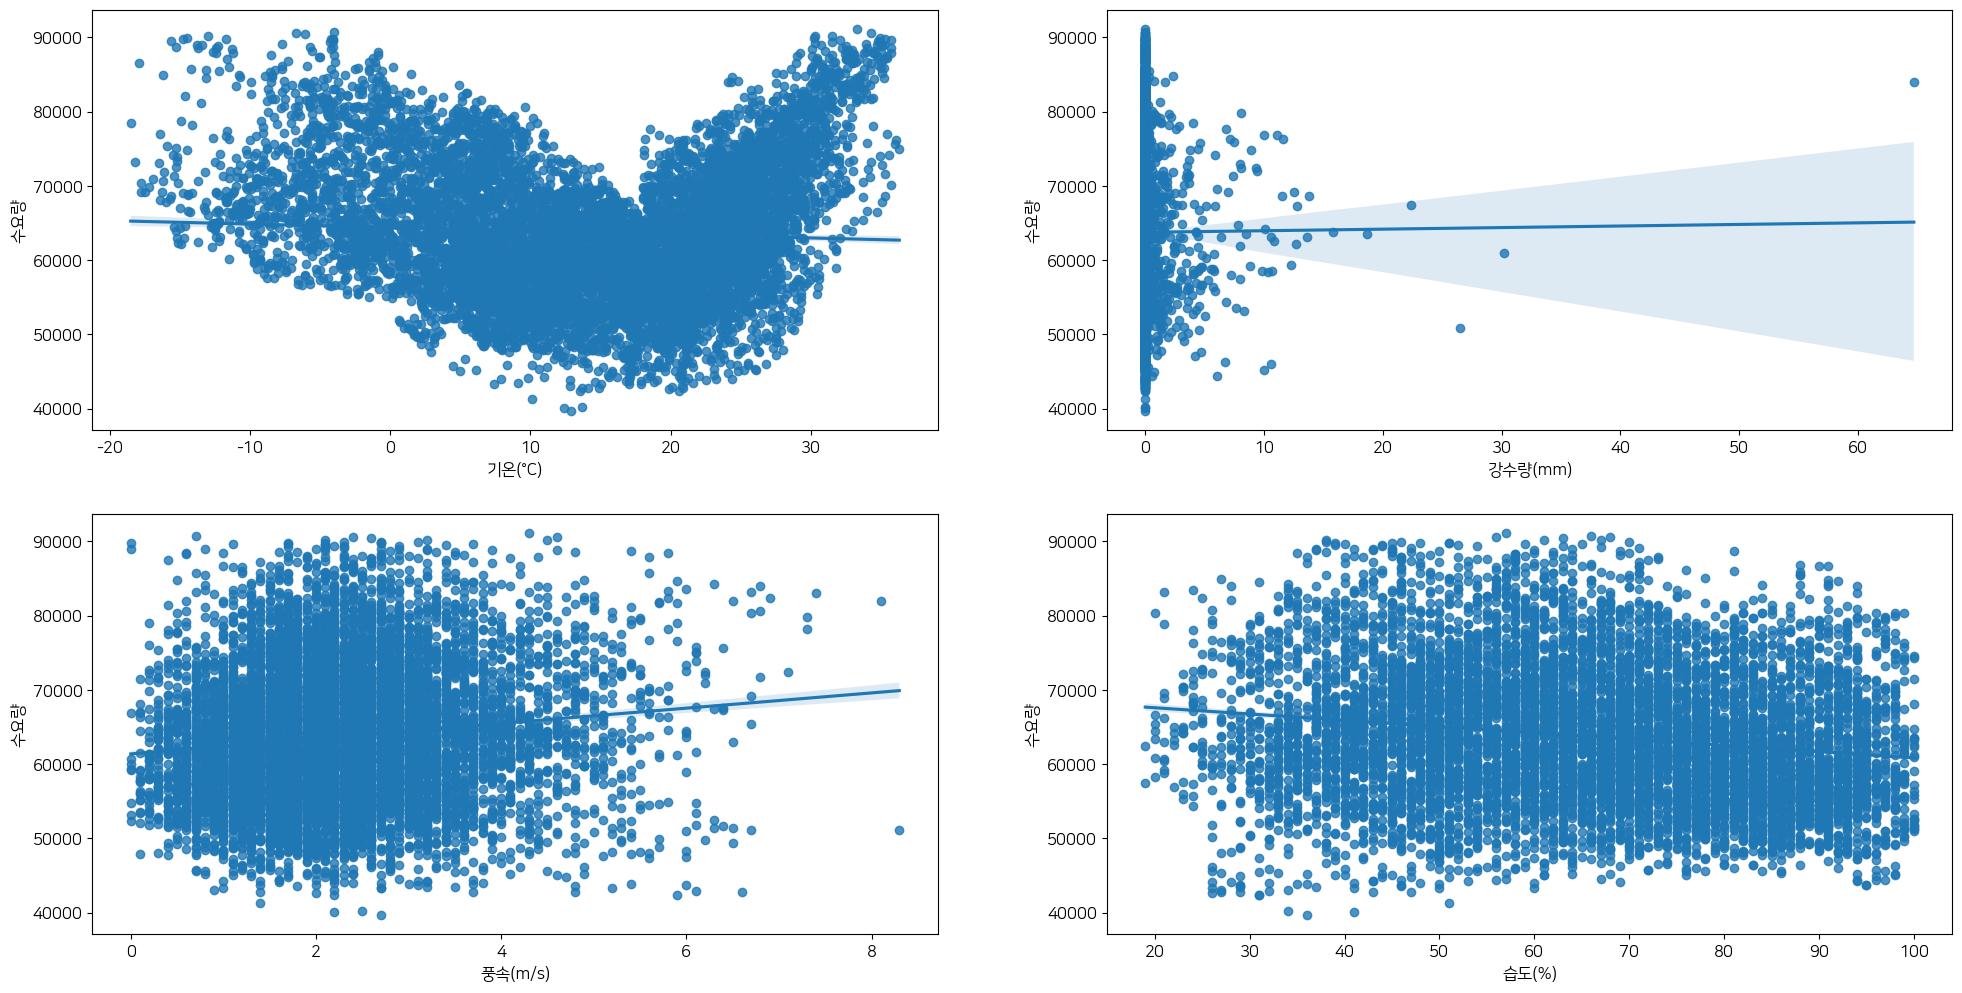

In [142]:
#위와 같은 방식으로 4개의 그래프를 그린다
fig, axs = plt.subplots(figsize=(24, 12), ncols=2, nrows=2)
lm_features = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2
    sns.regplot(x=feature, y='수요량', data=fin21, ax=axs[row][col])

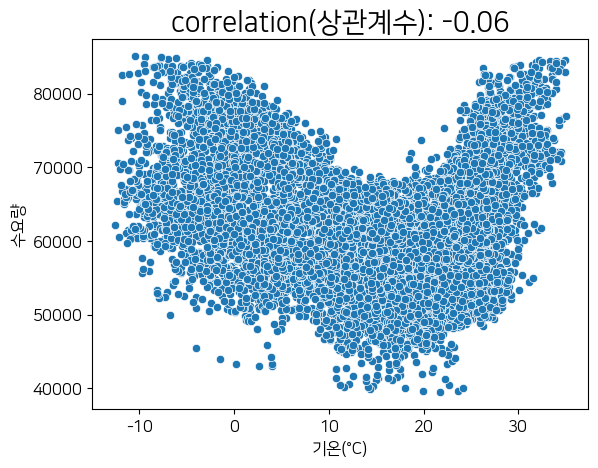

In [143]:
# 또한 17년도와 마찬가지로 상관계수를 구해본다
correlation = fin21['수요량'].corr(fin21['기온(°C)'])
sns.scatterplot(x=fin17['기온(°C)'], y=fin17['수요량'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("기온(°C)",fontsize=12)
plt.ylabel("수요량",fontsize=12)
plt.show()

In [144]:
#17년도부터 21년도까지 시간당 전체 기온 데이터를 불러온다
tem1 = pd.read_csv("data/기온데이터_병합.csv")
tem1

Unnamed: 0          날짜     시간  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)
0               0  2017-01-01   0:00     0.2      0.0      2.2   79.0
1               1  2017-01-01   1:00     0.0      0.0      1.4   78.0
2               2  2017-01-01   2:00    -0.3      0.0      1.9   81.0
3               3  2017-01-01   3:00    -0.7      0.0      2.0   84.0
4               4  2017-01-01   4:00    -1.1      0.0      1.6   85.0
...           ...         ...    ...     ...      ...      ...    ...
17515        8755  2021-12-31  19:00    -6.4      0.0      2.2   34.0
17516        8756  2021-12-31  20:00    -6.3      0.0      4.1   35.0
17517        8757  2021-12-31  21:00    -6.7      0.0      4.8   36.0
17518        8758  2021-12-31  22:00    -7.5      0.0      3.0   37.0
17519        8759  2021-12-31  23:00    -7.7      0.0      2.9   38.0

[17520 rows x 7 columns]

In [145]:
#이번엔 17년도부터 21년도까지 시간당 수요량 데이터를 불러온다
elec1 = pd.read_csv("data/fintime1721_df.csv")
elec1

날짜     시간    수요량
0      2017-01-01  00:00  59177
1      2017-01-01  01:00  59234
2      2017-01-01  02:00  56664
3      2017-01-01  03:00  54641
4      2017-01-01  04:00  53749
...           ...    ...    ...
17515  2021-12-31  19:00  74578
17516  2021-12-31  20:00  72976
17517  2021-12-31  21:00  71602
17518  2021-12-31  22:00  69383
17519  2021-12-31  23:00  68874

[17520 rows x 3 columns]

In [146]:
# 수요량 데이터에 날짜 컬럼을 지운다
elec1.drop(['날짜'], axis=1, inplace=True)

In [147]:
# 기온 데이터의 시간, Unnamed: 0 컬럼을 지운다
tem1.drop(['Unnamed: 0','시간'], axis=1, inplace=True)

In [148]:
# 컬럼을 지운 수요량 데이터와 기온 데이터 두개를 열 위치에서 병합한다
fin1 = pd.concat([tem1,elec1],axis=1)
fin1

날짜  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)     시간    수요량
0      2017-01-01     0.2      0.0      2.2   79.0  00:00  59177
1      2017-01-01     0.0      0.0      1.4   78.0  01:00  59234
2      2017-01-01    -0.3      0.0      1.9   81.0  02:00  56664
3      2017-01-01    -0.7      0.0      2.0   84.0  03:00  54641
4      2017-01-01    -1.1      0.0      1.6   85.0  04:00  53749
...           ...     ...      ...      ...    ...    ...    ...
17515  2021-12-31    -6.4      0.0      2.2   34.0  19:00  74578
17516  2021-12-31    -6.3      0.0      4.1   35.0  20:00  72976
17517  2021-12-31    -6.7      0.0      4.8   36.0  21:00  71602
17518  2021-12-31    -7.5      0.0      3.0   37.0  22:00  69383
17519  2021-12-31    -7.7      0.0      2.9   38.0  23:00  68874

[17520 rows x 7 columns]

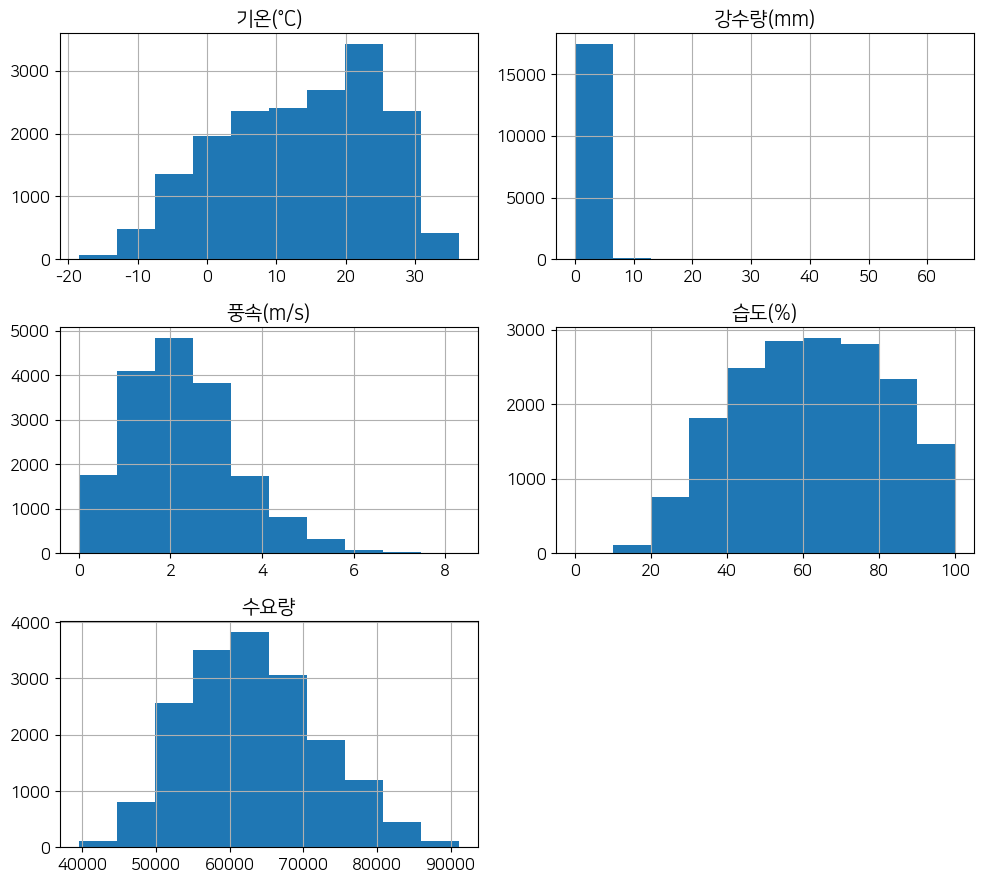

In [149]:
# x축으로 10, y축으로 9사이즈로 그래프를 그린다
fin1.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

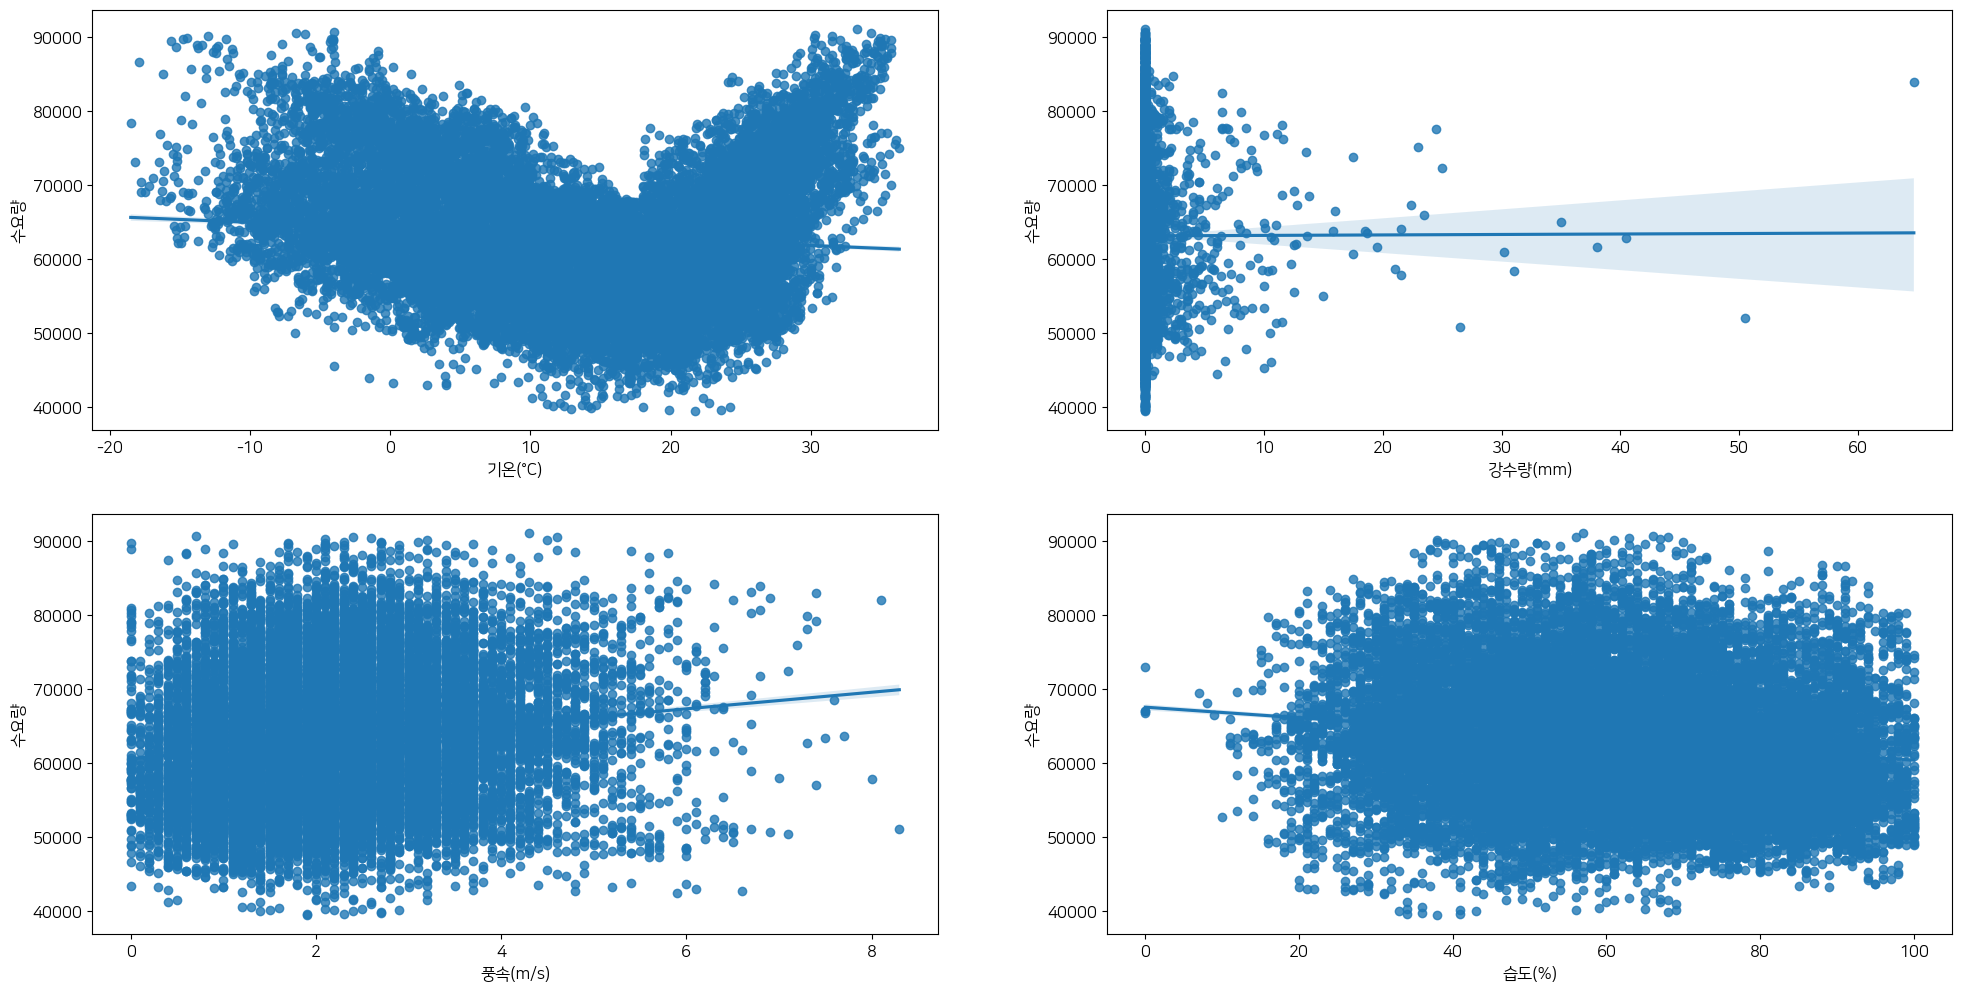

In [150]:
#이번엔 합친 전체 데이터를 각각 컬럼대로 그래프를 그려본다
fig, axs = plt.subplots(figsize=(24, 12), ncols=2, nrows=2)
lm_features = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2
    sns.regplot(x=feature, y='수요량', data=fin1, ax=axs[row][col])

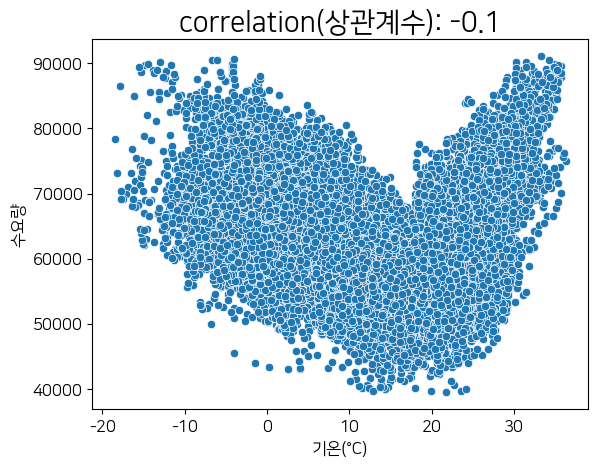

In [151]:
#수요량 과 기온의 상관계수를 구한다
correlation = fin1['수요량'].corr(fin1['기온(°C)'])
sns.scatterplot(x=fin1['기온(°C)'], y=fin1['수요량'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("기온(°C)",fontsize=12)
plt.ylabel("수요량",fontsize=12)
plt.show()

In [152]:
# plt.figure(figsize=(24,10))
# plt.subplot(1,2,1)
# g = sns.boxplot(x="기온(°C)", y="수요량", data=fin1, showfliers=False)
# g.set_title('기온과 전력수요량의 상관관계', size = 30)
# g.set_xticklabels(g.get_xticklabels(),rotation=90)
# plt.subplot(1,2,2)
# plt.plot(fin1.groupby('날짜')['수요량'].median(), marker='o')
# plt.grid(axis='y', linestyle='-', alpha=0.4)
# plt.title('연도별 전력수요량 중앙값', size = 30)
# plt.show()

# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

# 위쪽과 같은 방법으로 출력해본다

In [153]:
tem1721 = pd.read_csv("data/5년기온데이터_전처리.csv").drop(['Unnamed: 0'], axis=1)
tem1721

날짜     시간  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)
0      2017-01-01   0:00     0.2      0.0      2.2   79.0
1      2017-01-01   1:00     0.0      0.0      1.4   78.0
2      2017-01-01   2:00    -0.3      0.0      1.9   81.0
3      2017-01-01   3:00    -0.7      0.0      2.0   84.0
4      2017-01-01   4:00    -1.1      0.0      1.6   85.0
...           ...    ...     ...      ...      ...    ...
43819  2021-12-31  19:00    -6.4      0.0      2.2   34.0
43820  2021-12-31  20:00    -6.3      0.0      4.1   35.0
43821  2021-12-31  21:00    -6.7      0.0      4.8   36.0
43822  2021-12-31  22:00    -7.5      0.0      3.0   37.0
43823  2021-12-31  23:00    -7.7      0.0      2.9   38.0

[43824 rows x 6 columns]

In [154]:
elec1721 = pd.read_csv("data/fintime17_21_df.csv")
elec1721

날짜     시간    수요량
0      2017-01-01  00:00  59177
1      2017-01-01  01:00  59234
2      2017-01-01  02:00  56664
3      2017-01-01  03:00  54641
4      2017-01-01  04:00  53749
...           ...    ...    ...
43819  2021-12-31  19:00  74578
43820  2021-12-31  20:00  72976
43821  2021-12-31  21:00  71602
43822  2021-12-31  22:00  69383
43823  2021-12-31  23:00  68874

[43824 rows x 3 columns]

In [155]:
tem1721.drop(['시간'], axis=1, inplace=True)
elec1721.drop(['날짜'], axis=1, inplace=True)

In [156]:
fin1721 = pd.concat([tem1721,elec1721],axis=1)
fin1721

날짜  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)     시간    수요량
0      2017-01-01     0.2      0.0      2.2   79.0  00:00  59177
1      2017-01-01     0.0      0.0      1.4   78.0  01:00  59234
2      2017-01-01    -0.3      0.0      1.9   81.0  02:00  56664
3      2017-01-01    -0.7      0.0      2.0   84.0  03:00  54641
4      2017-01-01    -1.1      0.0      1.6   85.0  04:00  53749
...           ...     ...      ...      ...    ...    ...    ...
43819  2021-12-31    -6.4      0.0      2.2   34.0  19:00  74578
43820  2021-12-31    -6.3      0.0      4.1   35.0  20:00  72976
43821  2021-12-31    -6.7      0.0      4.8   36.0  21:00  71602
43822  2021-12-31    -7.5      0.0      3.0   37.0  22:00  69383
43823  2021-12-31    -7.7      0.0      2.9   38.0  23:00  68874

[43824 rows x 7 columns]

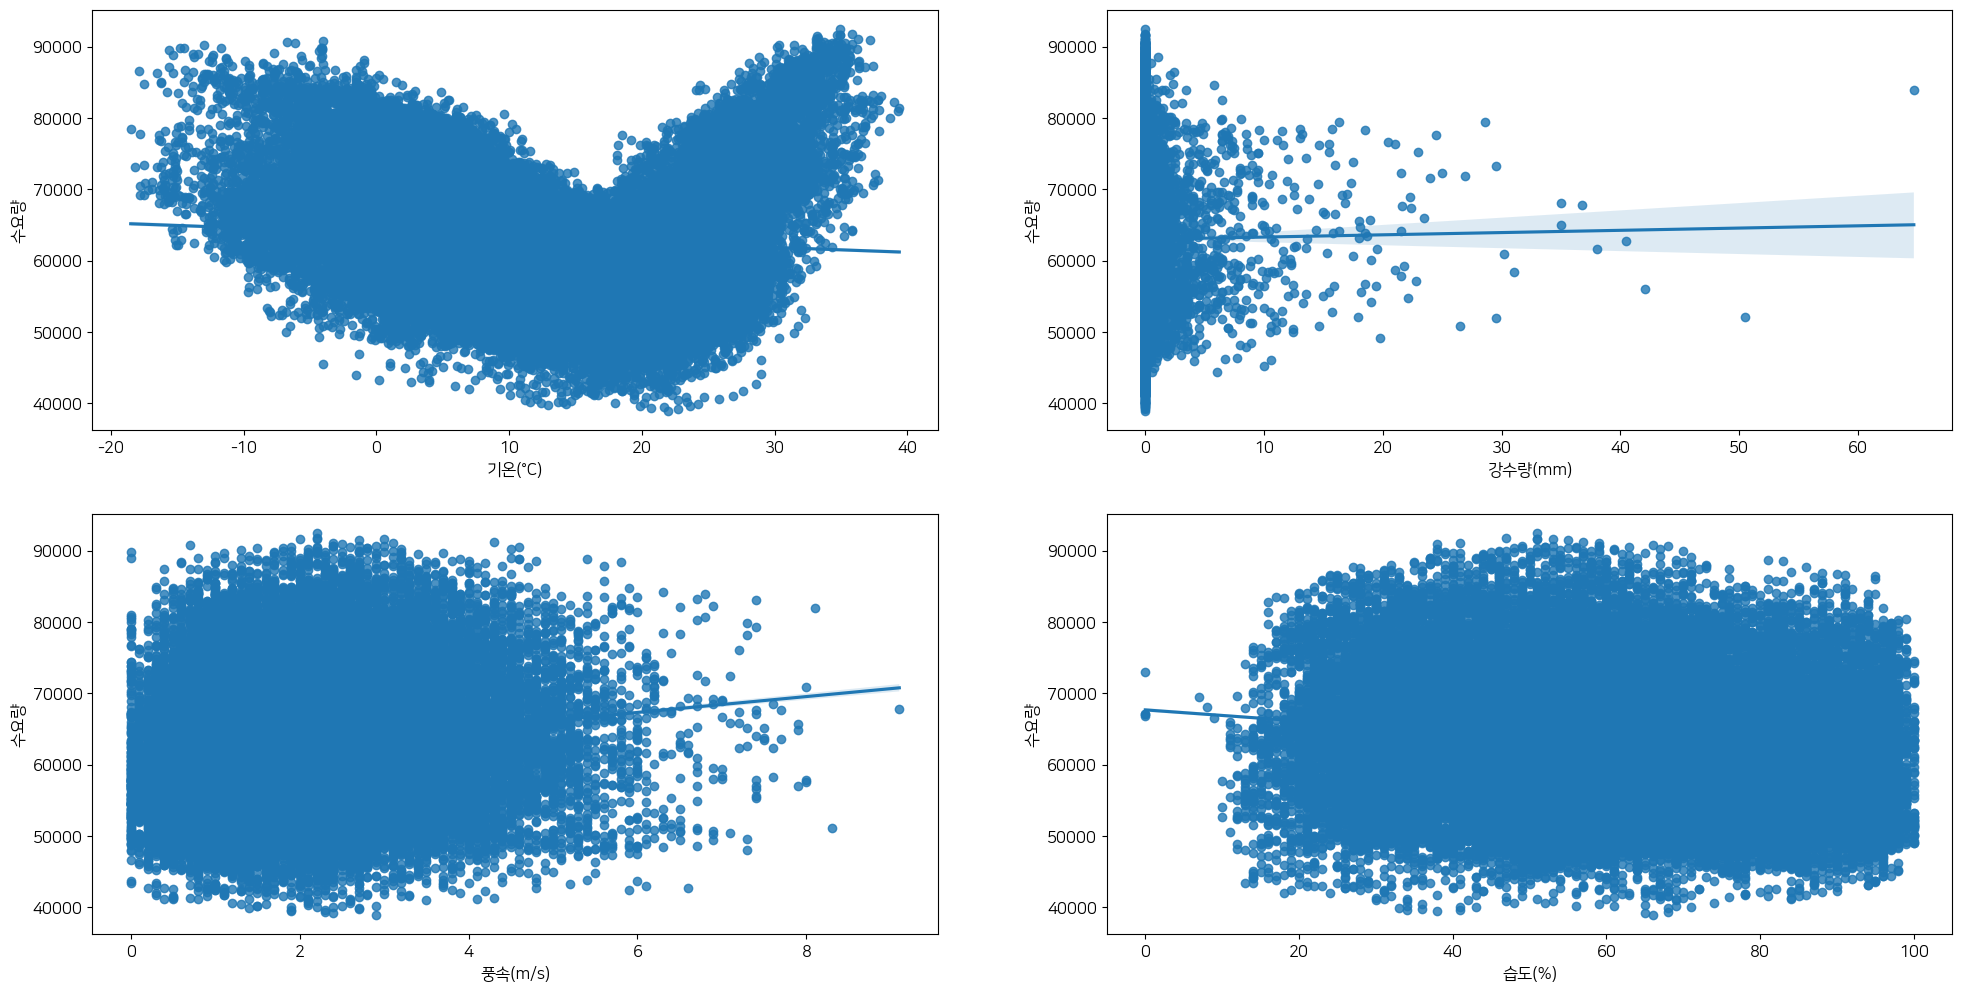

In [157]:
fig, axs = plt.subplots(figsize=(24, 12), ncols=2, nrows=2)
lm_features = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2
    sns.regplot(x=feature, y='수요량', data=fin1721, ax=axs[row][col])

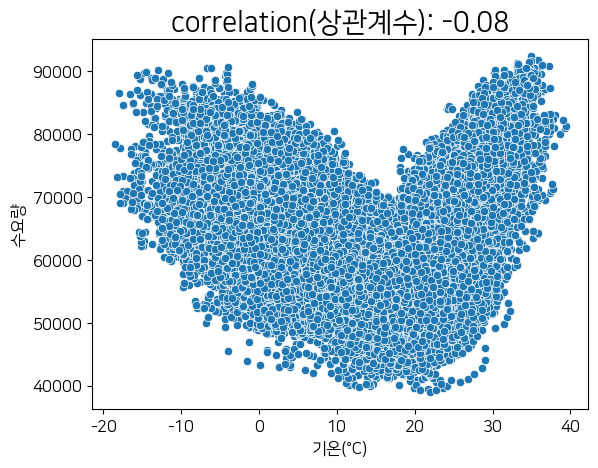

In [158]:
correlation = fin1721['수요량'].corr(fin1721['기온(°C)'])
sns.scatterplot(x=fin1721['기온(°C)'], y=fin1721['수요량'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("기온(°C)",fontsize=12)
plt.ylabel("수요량",fontsize=12)
plt.show()

# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [159]:
# tem1721 파일에 있는 날짜 컬럼에서 직접 입력한 부분들만 추출해서 tem1721sum로 저장한 뒤 index를 제거한다.
tem1721sum = tem1721[tem1721['날짜'].str.contains(
    "2017-04|2017-05|2017-06|2017-07|2017-08|2017-09|2018-04|2018-05|2018-06|2018-07|2018-08|2018-09|2019-04|2019-05|2019-06|2019-07|2019-08|2019-09|2020-04|2020-05|2020-06|2020-07|2020-08|2020-09|2021-04|2021-05|2021-06|2021-07|2021-08|2021-09")].reset_index()
tem1721sum.drop('index',axis=1, inplace=True)
tem1721sum

날짜  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)
0      2017-04-01     4.9      0.0      1.5   81.0
1      2017-04-01     5.1      0.0      1.3   77.0
2      2017-04-01     5.7      0.0      0.8   74.0
3      2017-04-01     5.7      0.0      0.6   77.0
4      2017-04-01     5.5      0.0      0.5   78.0
...           ...     ...      ...      ...    ...
21955  2021-09-30    22.7      0.0      0.2   71.0
21956  2021-09-30    21.7      0.0      0.9   79.0
21957  2021-09-30    20.9      0.0      0.4   83.0
21958  2021-09-30    20.4      0.0      0.8   81.0
21959  2021-09-30    19.7      0.0      1.4   81.0

[21960 rows x 5 columns]

In [187]:
# tem1721 파일에 있는 날짜 컬럼에서 직접 입력한 부분들을 *제외하고*(~을 사용했기에)  추출해서 tem1721sum로 저장한 뒤 index를 제거한다.
tem1721win = tem1721[~tem1721['날짜'].str.contains(
    "2017-04|2017-05|2017-06|2017-07|2017-08|2017-09|2018-04|2018-05|2018-06|2018-07|2018-08|2018-09|2019-04|2019-05|2019-06|2019-07|2019-08|2019-09|2020-04|2020-05|2020-06|2020-07|2020-08|2020-09|2021-04|2021-05|2021-06|2021-07|2021-08|2021-09")].reset_index()
tem1721win.drop('index',axis=1, inplace=True)

In [188]:
tem1721win

날짜     시간  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)
0      2017-01-01   0:00     0.2      0.0      2.2   79.0
1      2017-01-01   1:00     0.0      0.0      1.4   78.0
2      2017-01-01   2:00    -0.3      0.0      1.9   81.0
3      2017-01-01   3:00    -0.7      0.0      2.0   84.0
4      2017-01-01   4:00    -1.1      0.0      1.6   85.0
...           ...    ...     ...      ...      ...    ...
21859  2021-12-31  19:00    -6.4      0.0      2.2   34.0
21860  2021-12-31  20:00    -6.3      0.0      4.1   35.0
21861  2021-12-31  21:00    -6.7      0.0      4.8   36.0
21862  2021-12-31  22:00    -7.5      0.0      3.0   37.0
21863  2021-12-31  23:00    -7.7      0.0      2.9   38.0

[21864 rows x 6 columns]

In [162]:
# csv파일을 읽어온다
elec1721_=pd.read_csv("data/fintime17_21_df.csv")
elec1721_

날짜     시간    수요량
0      2017-01-01  00:00  59177
1      2017-01-01  01:00  59234
2      2017-01-01  02:00  56664
3      2017-01-01  03:00  54641
4      2017-01-01  04:00  53749
...           ...    ...    ...
43819  2021-12-31  19:00  74578
43820  2021-12-31  20:00  72976
43821  2021-12-31  21:00  71602
43822  2021-12-31  22:00  69383
43823  2021-12-31  23:00  68874

[43824 rows x 3 columns]

In [190]:
#위와 마찬가지로 날짜 컬럼에서 특정 문자가 포함된 날짜행들만 추출해서 출력한다(마찬가지로 인덱스는 제거한다)
elec1721sum = elec1721_[elec1721_['날짜'].str.contains(
    "2017-04|2017-05|2017-06|2017-07|2017-08|2017-09|2018-04|2018-05|2018-06|2018-07|2018-08|2018-09|2019-04|2019-05|2019-06|2019-07|2019-08|2019-09|2020-04|2020-05|2020-06|2020-07|2020-08|2020-09|2021-04|2021-05|2021-06|2021-07|2021-08|2021-09")].reset_index()
elec1721sum.drop('index',axis=1, inplace=True)
elec1721sum

날짜     시간    수요량
0      2017-04-01  00:00  59219
1      2017-04-01  01:00  59172
2      2017-04-01  02:00  56432
3      2017-04-01  03:00  54927
4      2017-04-01  04:00  54311
...           ...    ...    ...
21955  2021-09-30  19:00  72707
21956  2021-09-30  20:00  71174
21957  2021-09-30  21:00  68459
21958  2021-09-30  22:00  65543
21959  2021-09-30  23:00  62518

[21960 rows x 3 columns]

In [191]:
# 위의 기온 데이터와 마찬가지로 특정 문자가 포함된 것을 제거하고 출력해본다(마찬가지로 인덱스는 지운다)
elec1721win = elec1721_[~elec1721_['날짜'].str.contains(
    "2017-04|2017-05|2017-06|2017-07|2017-08|2017-09|2018-04|2018-05|2018-06|2018-07|2018-08|2018-09|2019-04|2019-05|2019-06|2019-07|2019-08|2019-09|2020-04|2020-05|2020-06|2020-07|2020-08|2020-09|2021-04|2021-05|2021-06|2021-07|2021-08|2021-09")].reset_index()
elec1721win.drop('index',axis=1, inplace=True)
elec1721win

날짜     시간    수요량
0      2017-01-01  00:00  59177
1      2017-01-01  01:00  59234
2      2017-01-01  02:00  56664
3      2017-01-01  03:00  54641
4      2017-01-01  04:00  53749
...           ...    ...    ...
21859  2021-12-31  19:00  74578
21860  2021-12-31  20:00  72976
21861  2021-12-31  21:00  71602
21862  2021-12-31  22:00  69383
21863  2021-12-31  23:00  68874

[21864 rows x 3 columns]

In [165]:
elec1721sum.drop(['날짜'], axis=1, inplace=True)

In [192]:
#지우고 추출한 데이터들을 컬럼 기준으로 붙인다
fin1721sum = pd.concat([tem1721sum,elec1721sum],axis=1)
fin1721sum

날짜  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)          날짜     시간    수요량
0      2017-04-01     4.9      0.0      1.5   81.0  2017-04-01  00:00  59219
1      2017-04-01     5.1      0.0      1.3   77.0  2017-04-01  01:00  59172
2      2017-04-01     5.7      0.0      0.8   74.0  2017-04-01  02:00  56432
3      2017-04-01     5.7      0.0      0.6   77.0  2017-04-01  03:00  54927
4      2017-04-01     5.5      0.0      0.5   78.0  2017-04-01  04:00  54311
...           ...     ...      ...      ...    ...         ...    ...    ...
21955  2021-09-30    22.7      0.0      0.2   71.0  2021-09-30  19:00  72707
21956  2021-09-30    21.7      0.0      0.9   79.0  2021-09-30  20:00  71174
21957  2021-09-30    20.9      0.0      0.4   83.0  2021-09-30  21:00  68459
21958  2021-09-30    20.4      0.0      0.8   81.0  2021-09-30  22:00  65543
21959  2021-09-30    19.7      0.0      1.4   81.0  2021-09-30  23:00  62518

[21960 rows x 8 columns]

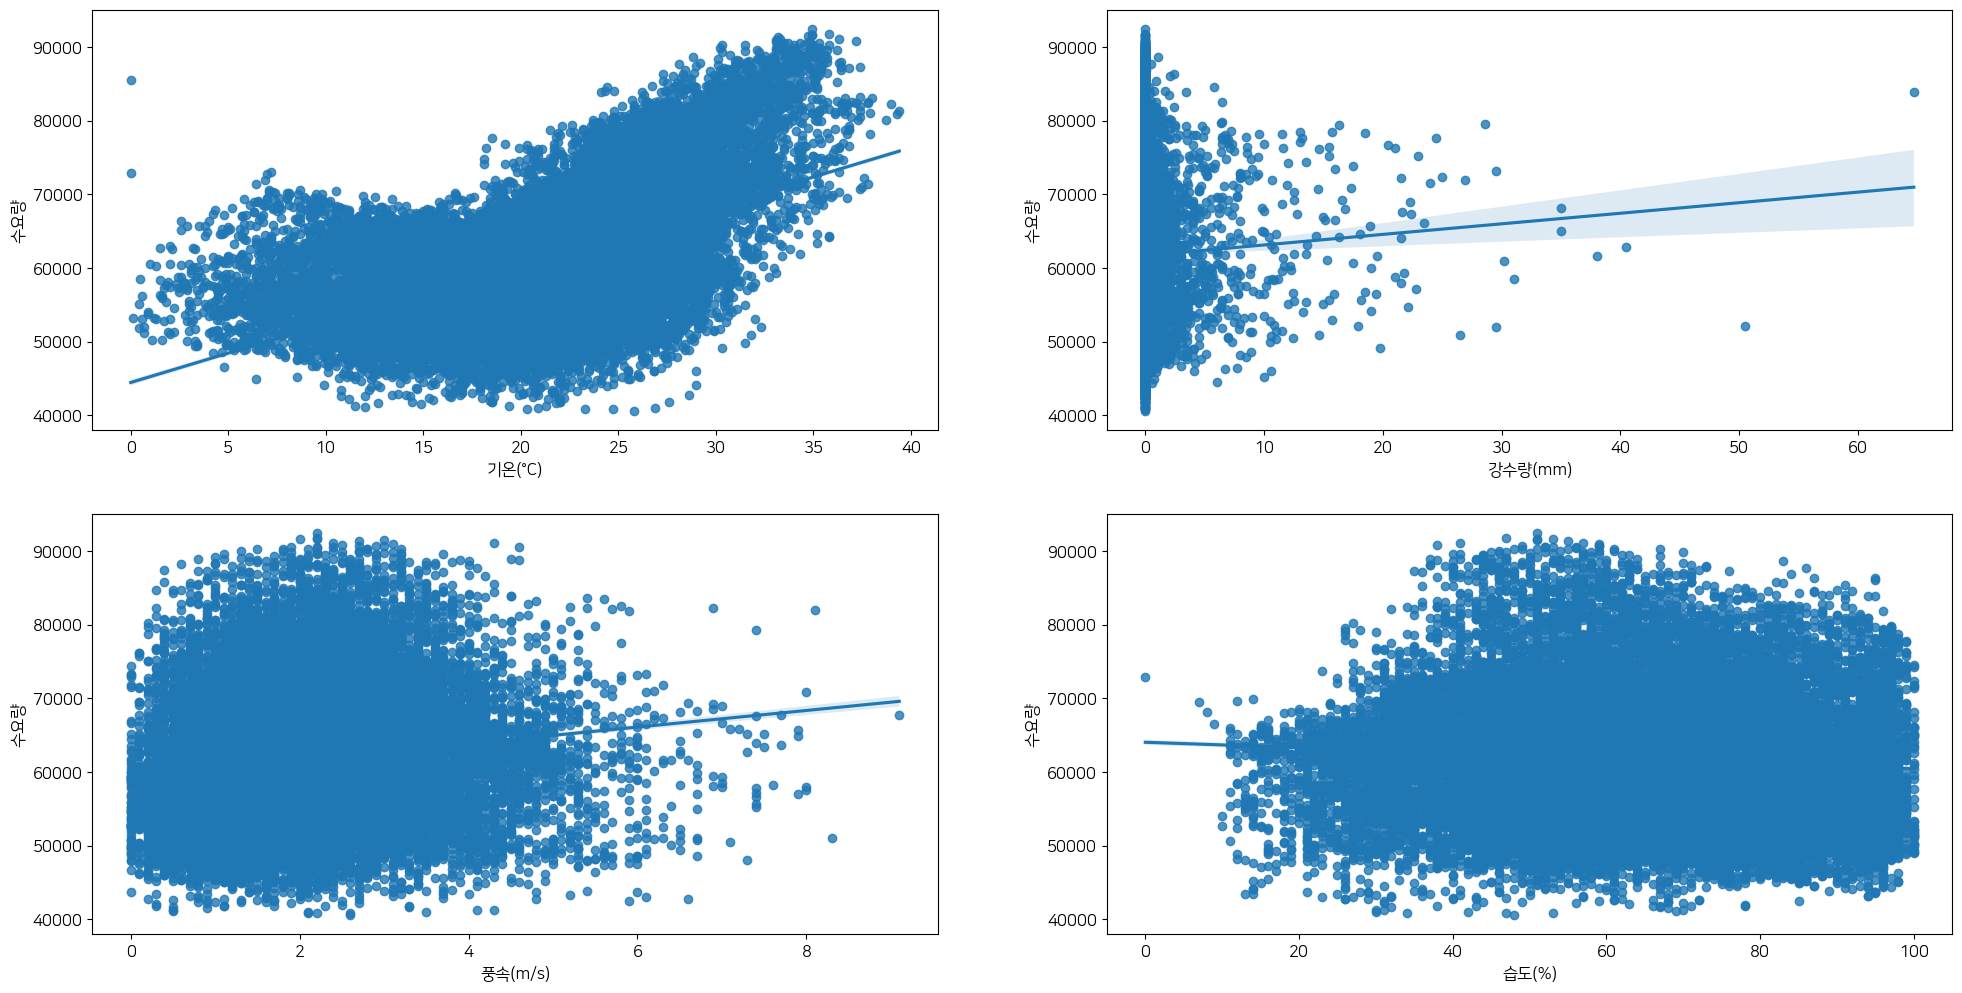

In [167]:
# 가로24 세로 12 사이즈로 2x2 그래프들을 그려본다
fig, axs = plt.subplots(figsize=(24, 12), ncols=2, nrows=2)
lm_features = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2
    sns.regplot(x=feature, y='수요량', data=fin1721sum, ax=axs[row][col])

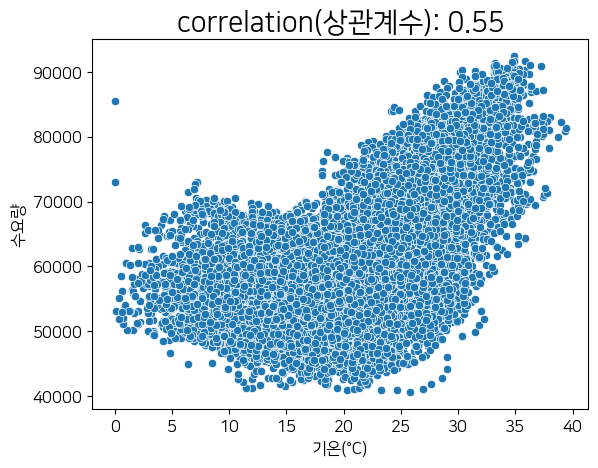

In [168]:
# 수요량과 기온 데이터의 상관관계를 그려본다
correlation = fin1721sum['수요량'].corr(fin1721sum['기온(°C)'])
sns.scatterplot(x=fin1721sum['기온(°C)'], y=fin1721sum['수요량'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("기온(°C)",fontsize=12)
plt.ylabel("수요량",fontsize=12)
plt.show()

In [169]:
# 날짜 컬럼을 지운다
elec1721win.drop(['날짜'], axis=1, inplace=True)

In [170]:
# 컬럼 기준으로(세로로)두개의 csv파일을 붙인다
fin1721win = pd.concat([tem1721win,elec1721win],axis=1)
fin1721win

날짜  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)     시간    수요량
0      2017-01-01     0.2      0.0      2.2   79.0  00:00  59177
1      2017-01-01     0.0      0.0      1.4   78.0  01:00  59234
2      2017-01-01    -0.3      0.0      1.9   81.0  02:00  56664
3      2017-01-01    -0.7      0.0      2.0   84.0  03:00  54641
4      2017-01-01    -1.1      0.0      1.6   85.0  04:00  53749
...           ...     ...      ...      ...    ...    ...    ...
21859  2021-12-31    -6.4      0.0      2.2   34.0  19:00  74578
21860  2021-12-31    -6.3      0.0      4.1   35.0  20:00  72976
21861  2021-12-31    -6.7      0.0      4.8   36.0  21:00  71602
21862  2021-12-31    -7.5      0.0      3.0   37.0  22:00  69383
21863  2021-12-31    -7.7      0.0      2.9   38.0  23:00  68874

[21864 rows x 7 columns]

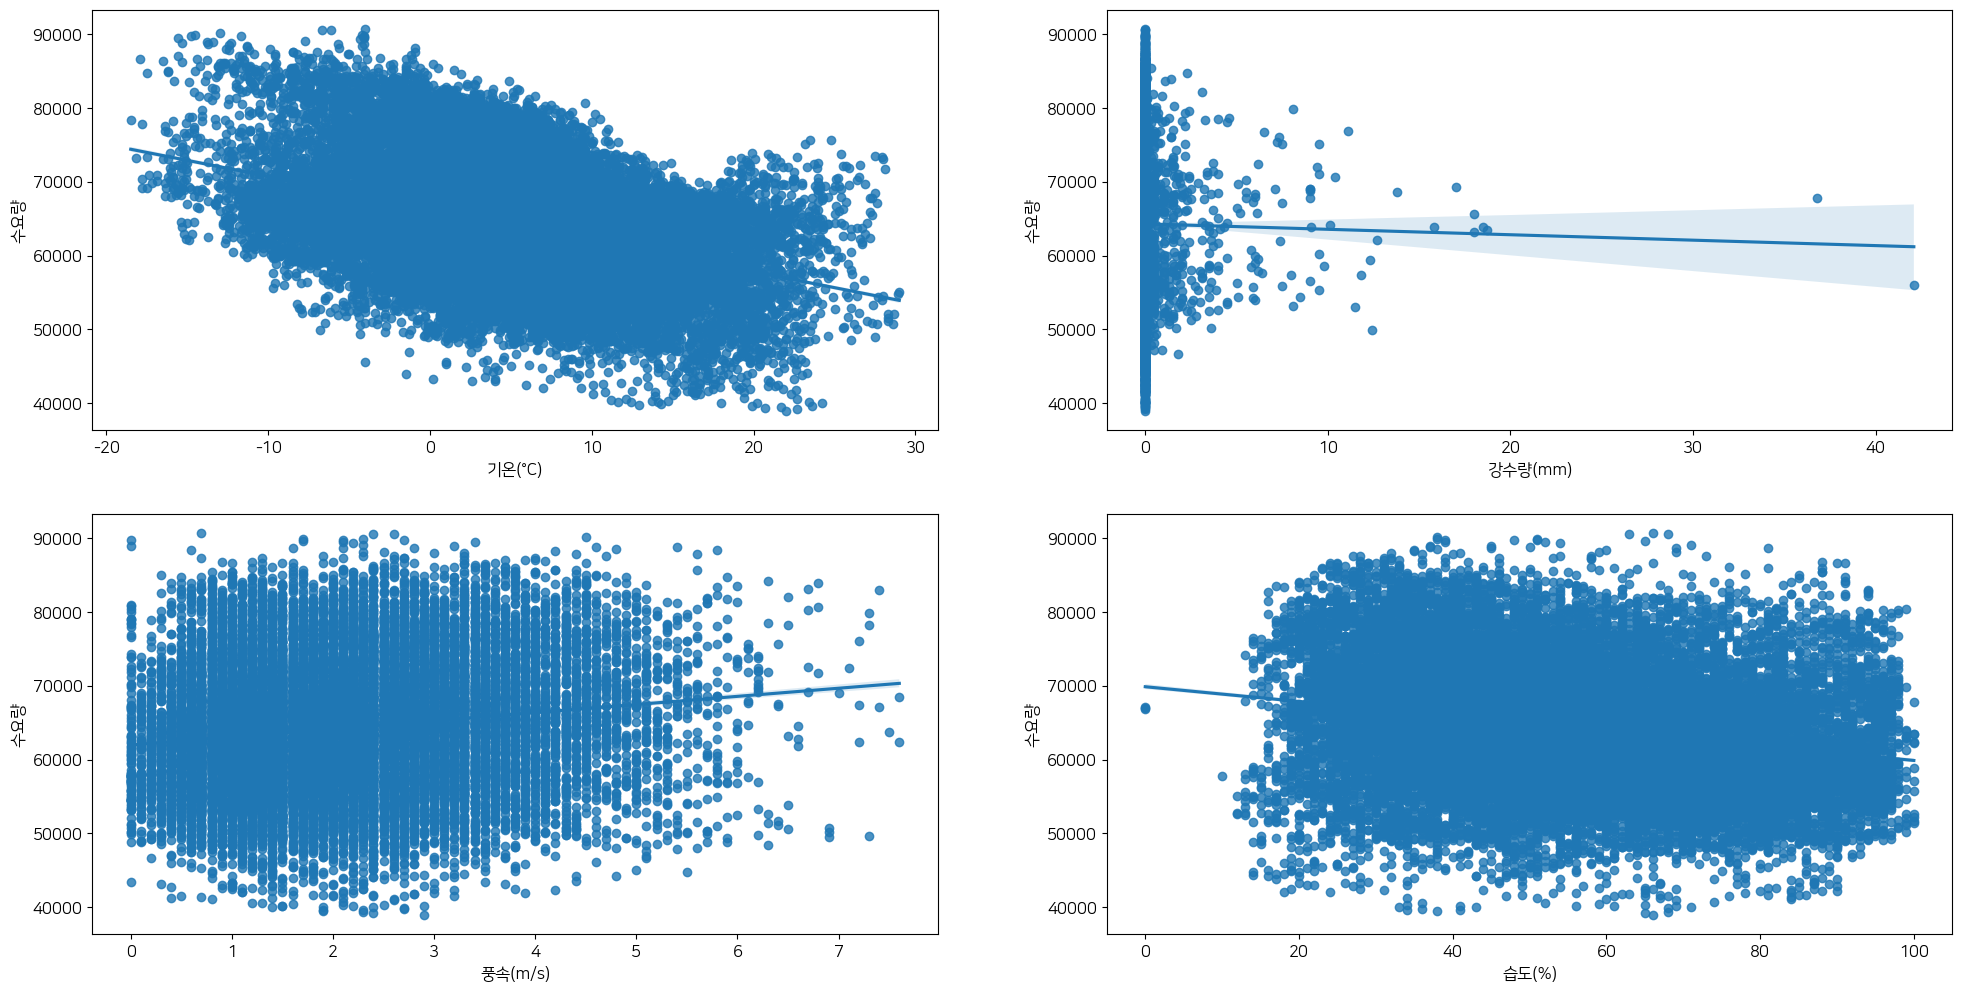

In [171]:
# 합친 csv 파일을 위와 같은 방식으로 그려본다
fig, axs = plt.subplots(figsize=(24, 12), ncols=2, nrows=2)
lm_features = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2
    sns.regplot(x=feature, y='수요량', data=fin1721win, ax=axs[row][col])

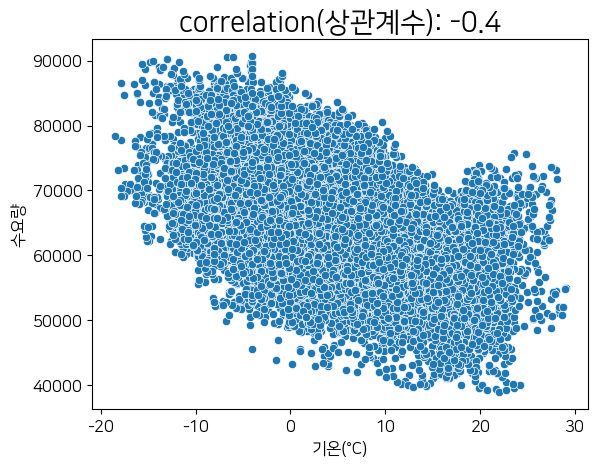

In [172]:
# 합친 csv파일의 수요량과 기온량의 상관계수를 구해본다
correlation = fin1721win['수요량'].corr(fin1721win['기온(°C)'])
sns.scatterplot(x=fin1721win['기온(°C)'], y=fin1721win['수요량'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("기온(°C)",fontsize=12)
plt.ylabel("수요량",fontsize=12)
plt.show()

In [173]:
tem1721 = pd.read_csv("data/5년기온데이터_전처리.csv").drop(['Unnamed: 0'], axis=1)

In [174]:
# 매해 6,7,8,월달 기온 데이터를 날짜 컬럼 기준으로 추출해본다
tem17210608 = tem1721[tem1721['날짜'].str.contains(
    "2017-06|2017-07|2017-08|2018-06|2018-07|2018-08|2019-06|2019-07|2019-08|2020-06|2020-07|2020-08|2021-06|2021-07|2021-08")].reset_index()
tem17210608.drop('index',axis=1, inplace=True)
tem17210608.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11040 entries, 0 to 11039
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       11040 non-null  object 
 1   시간       11040 non-null  object 
 2   기온(°C)   11040 non-null  float64
 3   강수량(mm)  11040 non-null  float64
 4   풍속(m/s)  11040 non-null  float64
 5   습도(%)    11040 non-null  float64
dtypes: float64(4), object(2)
memory usage: 517.6+ KB


In [175]:
elec1721=pd.read_csv("data/fintime17_21_df.csv")

In [176]:
# 매해 6,7,8,월달 수요량 데이터를 날짜 컬럼 기준으로 추출해본다
elec17210608 = elec1721[elec1721['날짜'].str.contains(
    "2017-06|2017-07|2017-08|2018-06|2018-07|2018-08|2019-06|2019-07|2019-08|2020-06|2020-07|2020-08|2021-06|2021-07|2021-08")].reset_index()
elec17210608.drop('index',axis=1, inplace=True)
elec17210608

날짜     시간    수요량
0      2017-06-01  00:00  58038
1      2017-06-01  01:00  54763
2      2017-06-01  02:00  52836
3      2017-06-01  03:00  51956
4      2017-06-01  04:00  51299
...           ...    ...    ...
11035  2021-08-31  19:00  74786
11036  2021-08-31  20:00  74099
11037  2021-08-31  21:00  71232
11038  2021-08-31  22:00  68114
11039  2021-08-31  23:00  64780

[11040 rows x 3 columns]

In [177]:
# 각각 필요 없는 컬럼을 지우고
tem17210608.drop(['시간'], axis=1, inplace=True)
elec17210608.drop(['날짜'], axis=1, inplace=True)

In [178]:
# 컬럼 기준으로 합친다
fin17210608 = pd.concat([tem17210608,elec17210608],axis=1)
fin17210608

날짜  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)     시간    수요량
0      2017-06-01    21.4      0.0      1.8   74.0  00:00  58038
1      2017-06-01    21.5      0.0      0.9   75.0  01:00  54763
2      2017-06-01    21.3      0.0      1.7   77.0  02:00  52836
3      2017-06-01    20.9      0.0      2.4   81.0  03:00  51956
4      2017-06-01    20.6      0.0      1.1   82.0  04:00  51299
...           ...     ...      ...      ...    ...    ...    ...
11035  2021-08-31    18.1      3.8      3.9   98.0  19:00  74786
11036  2021-08-31    18.1      1.6      4.3   99.0  20:00  74099
11037  2021-08-31    18.1      3.6      3.8   99.0  21:00  71232
11038  2021-08-31    18.3      2.1      3.3  100.0  22:00  68114
11039  2021-08-31    18.5      7.8      2.6  100.0  23:00  64780

[11040 rows x 7 columns]

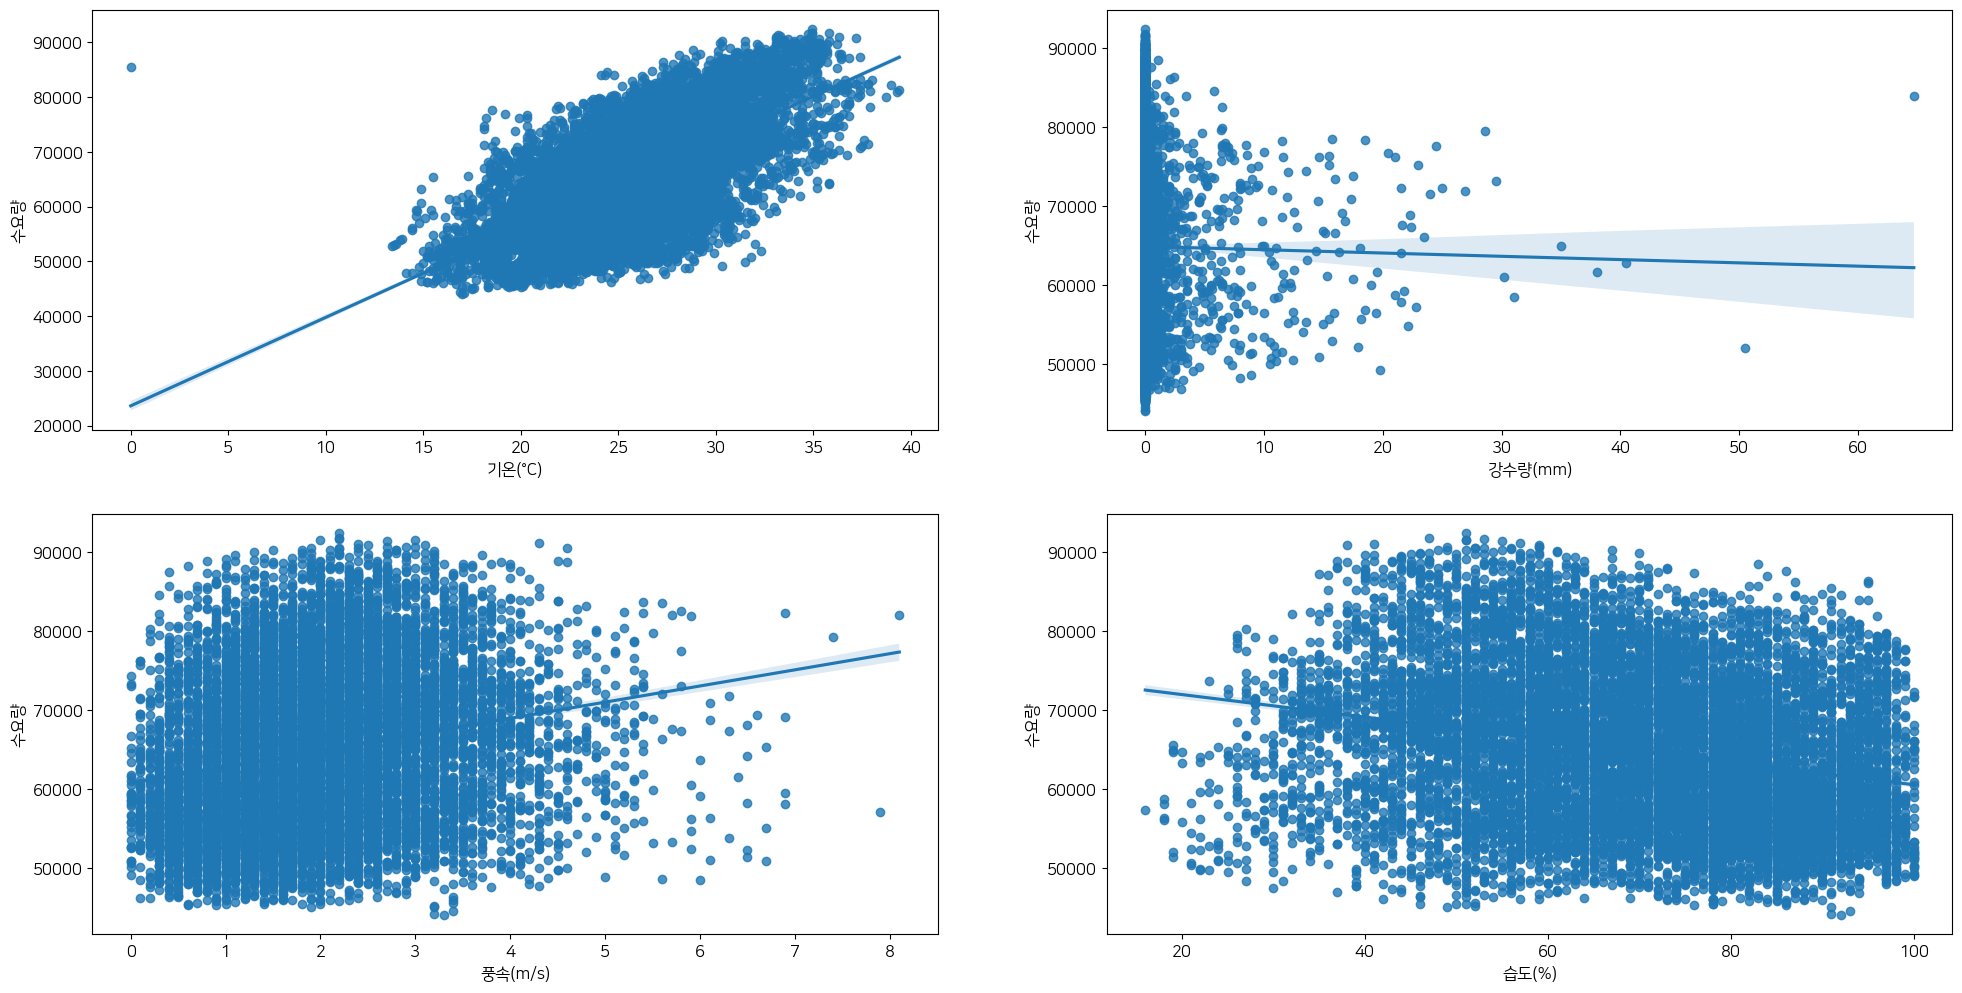

In [179]:
# 합친 csv 파일을 컬럼에 맞게 그래프를 그려본다
fig, axs = plt.subplots(figsize=(24, 12), ncols=2, nrows=2)
lm_features = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2
    sns.regplot(x=feature, y='수요량', data=fin17210608, ax=axs[row][col])

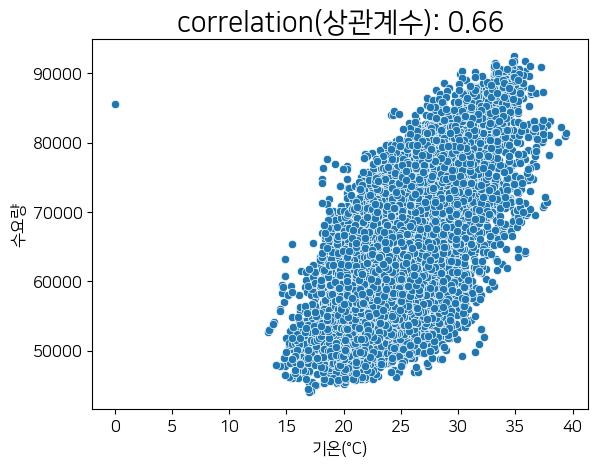

In [180]:
# 다시한번 수요량과 기온의 상관계수를 구해본다
correlation = fin17210608['수요량'].corr(fin17210608['기온(°C)'])
sns.scatterplot(x=fin17210608['기온(°C)'], y=fin17210608['수요량'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("기온(°C)",fontsize=12)
plt.ylabel("수요량",fontsize=12)
plt.show()

In [ ]:
# 아래로 위와 마찬가지 방법으로 12,1,2월달 기온데이터, 수요량데이터를 가져와서 상관계수를 구해본다

In [181]:
tem17210112 = tem1721[tem1721['날짜'].str.contains(
    "2017-01|2017-02|2017-12|2018-01|2018-02|2018-12|2019-01|2019-02|2019-12|2020-01|2020-02|2020-12|2021-01|2021-02|2021-12")].reset_index()
tem17210112.drop('index',axis=1, inplace=True)
tem17210112

날짜     시간  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)
0      2017-01-01   0:00     0.2      0.0      2.2   79.0
1      2017-01-01   1:00     0.0      0.0      1.4   78.0
2      2017-01-01   2:00    -0.3      0.0      1.9   81.0
3      2017-01-01   3:00    -0.7      0.0      2.0   84.0
4      2017-01-01   4:00    -1.1      0.0      1.6   85.0
...           ...    ...     ...      ...      ...    ...
10819  2021-12-31  19:00    -6.4      0.0      2.2   34.0
10820  2021-12-31  20:00    -6.3      0.0      4.1   35.0
10821  2021-12-31  21:00    -6.7      0.0      4.8   36.0
10822  2021-12-31  22:00    -7.5      0.0      3.0   37.0
10823  2021-12-31  23:00    -7.7      0.0      2.9   38.0

[10824 rows x 6 columns]

In [182]:
elec17210112 = elec1721[elec1721['날짜'].str.contains(
    "2017-01|2017-02|2017-12|2018-01|2018-02|2018-12|2019-01|2019-02|2019-12|2020-01|2020-02|2020-12|2021-01|2021-02|2021-12")].reset_index()
elec17210112.drop('index',axis=1, inplace=True)
elec17210112

날짜     시간    수요량
0      2017-01-01  00:00  59177
1      2017-01-01  01:00  59234
2      2017-01-01  02:00  56664
3      2017-01-01  03:00  54641
4      2017-01-01  04:00  53749
...           ...    ...    ...
10819  2021-12-31  19:00  74578
10820  2021-12-31  20:00  72976
10821  2021-12-31  21:00  71602
10822  2021-12-31  22:00  69383
10823  2021-12-31  23:00  68874

[10824 rows x 3 columns]

In [183]:
tem17210112.drop(['시간'], axis=1, inplace=True)
elec17210112.drop(['날짜'], axis=1, inplace=True)

In [184]:
fin17210112 = pd.concat([tem17210112,elec17210112],axis=1)
fin17210112

날짜  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)     시간    수요량
0      2017-01-01     0.2      0.0      2.2   79.0  00:00  59177
1      2017-01-01     0.0      0.0      1.4   78.0  01:00  59234
2      2017-01-01    -0.3      0.0      1.9   81.0  02:00  56664
3      2017-01-01    -0.7      0.0      2.0   84.0  03:00  54641
4      2017-01-01    -1.1      0.0      1.6   85.0  04:00  53749
...           ...     ...      ...      ...    ...    ...    ...
10819  2021-12-31    -6.4      0.0      2.2   34.0  19:00  74578
10820  2021-12-31    -6.3      0.0      4.1   35.0  20:00  72976
10821  2021-12-31    -6.7      0.0      4.8   36.0  21:00  71602
10822  2021-12-31    -7.5      0.0      3.0   37.0  22:00  69383
10823  2021-12-31    -7.7      0.0      2.9   38.0  23:00  68874

[10824 rows x 7 columns]

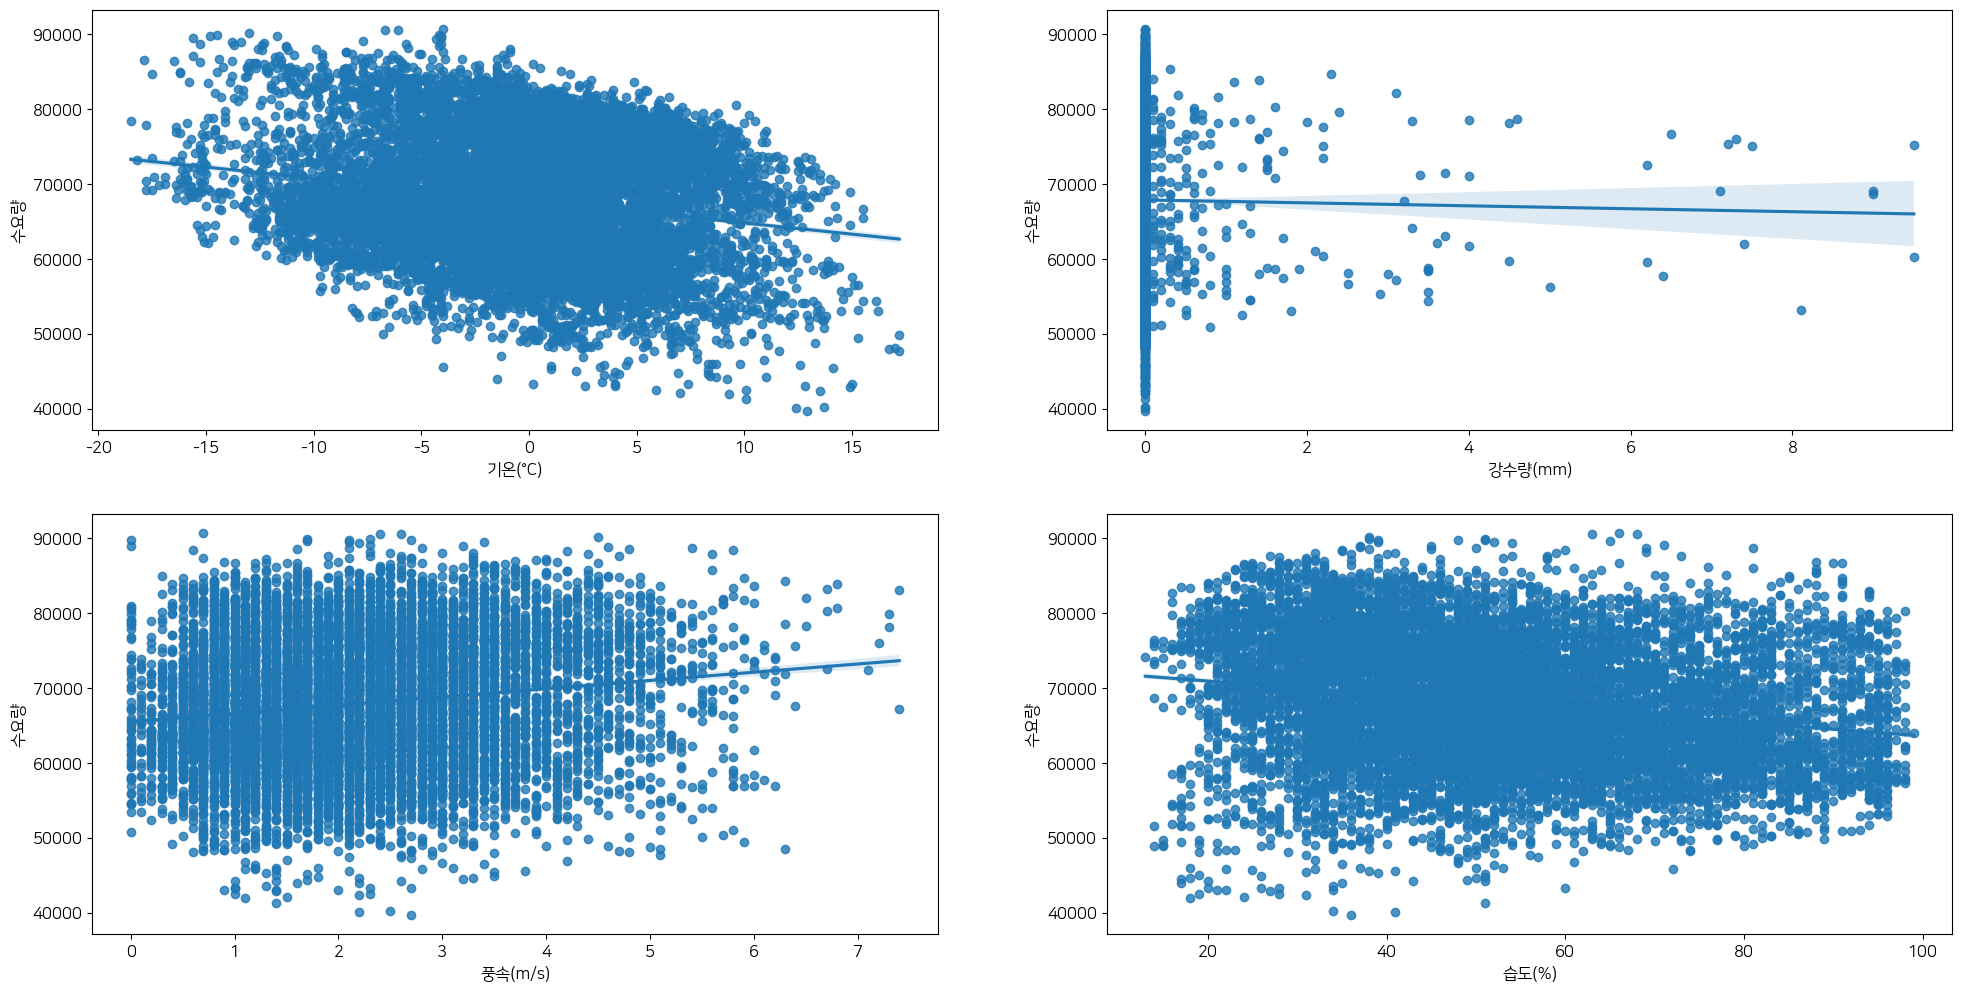

In [185]:
fig, axs = plt.subplots(figsize=(24, 12), ncols=2, nrows=2)
lm_features = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2
    sns.regplot(x=feature, y='수요량', data=fin17210112, ax=axs[row][col])

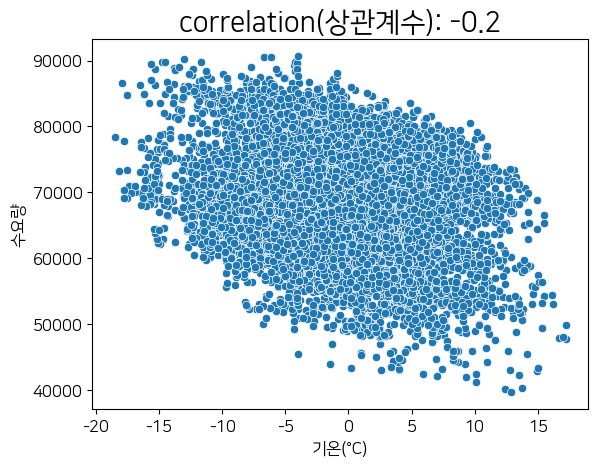

In [186]:
correlation = fin17210112['수요량'].corr(fin17210112['기온(°C)'])
sns.scatterplot(x=fin17210112['기온(°C)'], y=fin17210112['수요량'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("기온(°C)",fontsize=12)
plt.ylabel("수요량",fontsize=12)
plt.show()